# Nomic Embeddings

Nomic has released a new embedding model with strong performance for long context retrieval (8k context window).

The cookbook walks through the process of building and deploying (via LangServe) a RAG app using Nomic embeddings.

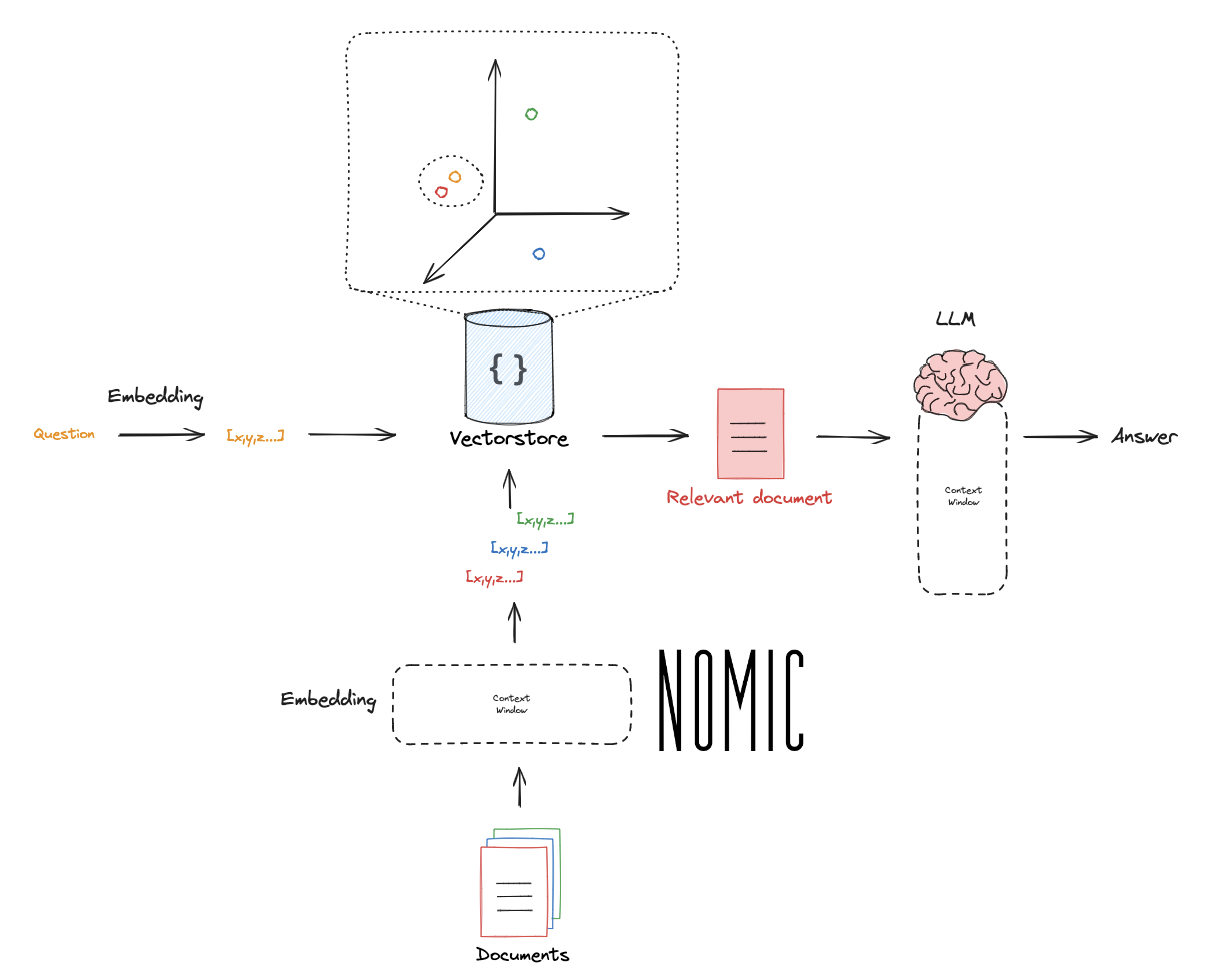

## Signup

Get your API token, then run:
```
! nomic login
```

Then run with your generated API token 
```
! nomic login < token > 
```

In [1]:
import pandas as pd
from langchain_core.documents.base import Document

df = pd.read_csv("./trust_pilot.csv")

# Try a csv parser
docs_list = [Document(page_content = f"""
    Description: {row["description"]},
    Star Number is {row["star_number_c"]},
""") for i, row in df.iterrows()]

In [16]:
! nomic login

                        Authenticate with the Nomic API                         
                        https://atlas.nomic.ai/cli-login                        
  Click the above link to retrieve your access token and then run `nomic login  
                                    [token]`                                    


In [17]:
! nomic login X3Be1zJ0ou8jfXIZfB503eJUJa71uDbrHWkhgSx1eDLOs

In [3]:
! pip install -U langchain-nomic langchain_community tiktoken langchain-openai chromadb langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 2.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 6.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 3.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 5.9 MB/s eta 0

In [8]:
# Optional: LangSmith API keys
import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = "api_key"

## Document Loading

Let's test 3 interesting blog posts.

In [2]:
from langchain_community.document_loaders import WebBaseLoader

urls = [
    # "https://ellipsedata.com/careers/",
    "https://en.wikipedia.org/wiki/France",
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
    "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/",
    "https://www.cazoo.co.uk/car-details/e0461d99-7dde-58db-a66b-bcfe5c2532da/"
]

docs = [WebBaseLoader(url).load() for url in urls]
docs_list = [item for sublist in docs for item in sublist]

In [3]:
docs_list[0]

Document(page_content='\n\n\n\nFrance - Wikipedia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nJump to content\n\n\n\n\n\n\n\nMain menu\n\n\n\n\n\nMain menu\nmove to sidebar\nhide\n\n\n\n\t\tNavigation\n\t\n\n\nMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate\n\n\n\n\n\n\t\tContribute\n\t\n\n\nHelpLearn to editCommunity portalRecent changesUpload file\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCreate account\n\nLog in\n\n\n\n\n\n\n\n\nPersonal tools\n\n\n\n\n\n Create account Log in\n\n\n\n\n\n\t\tPages for logged out editors learn more\n\n\n\nContributionsTalk\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nContents\nmove to sidebar\nhide\n\n\n\n\n(Top)\n\n\n\n\n\n1Etymology and pronunciation\n\n\n\n\n\n\n\n2History\n\n\n\nToggle History subsection\n\n\n\n\n\n2.1Pre-6th century BC\n\n\n\n\n\n\n\n2.2Antiquity (6th century BC – 5th ce

## Splitting 

Long context retrieval 

In [37]:
# from langchain.text_splitter import CharacterTextSplitter

# text_splitter = CharacterTextSplitter.from_tiktoken_encoder(
#     chunk_size=7500, chunk_overlap=1
# )
# doc_splits = text_splitter.split_documents(docs_list)

In [3]:
doc_splits

[Document(page_content='LLM Powered Autonomous Agents | Lil\'Log\n\nLil\'Log\n\n\nPosts\n\n\nArchive\n\n\nSearch\n\n\nTags\n\n\nFAQ\n\n\nemojisearch.app\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\nAgent System Overview\n\nComponent One: Planning\n\nTask Decomposition\n\nSelf-Reflection\n\n\nComponent Two: Memory\n\nTypes of Memory\n\nMaximum Inner Product Search (MIPS)\n\n\nComponent Three: Tool Use\n\nCase Studies\n\nScientific Discovery Agent\n\nGenerative Agents Simulation\n\nProof-of-Concept Examples\n\n\nChallenges\n\nCitation\n\nReferences\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful gene

In [12]:
import tiktoken

encoding = tiktoken.get_encoding("cl100k_base")
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")
for d in docs_list:
    print("The document is %s tokens" % len(encoding.encode(d.page_content)))

The document is 22 tokens
The document is 47 tokens
The document is 80 tokens
The document is 45 tokens
The document is 203 tokens
The document is 71 tokens
The document is 157 tokens
The document is 112 tokens
The document is 52 tokens
The document is 15 tokens
The document is 196 tokens
The document is 63 tokens
The document is 50 tokens
The document is 33 tokens
The document is 46 tokens
The document is 44 tokens
The document is 16 tokens
The document is 116 tokens
The document is 38 tokens
The document is 21 tokens
The document is 22 tokens
The document is 39 tokens
The document is 17 tokens
The document is 37 tokens
The document is 23 tokens
The document is 36 tokens
The document is 63 tokens
The document is 123 tokens
The document is 15 tokens
The document is 39 tokens
The document is 41 tokens
The document is 25 tokens
The document is 74 tokens
The document is 35 tokens
The document is 96 tokens
The document is 46 tokens
The document is 202 tokens
The document is 329 tokens
The 

## Index 

Nomic embeddings [here](https://docs.nomic.ai/reference/endpoints/nomic-embed-text). 

In [13]:
import os

from langchain_community.vectorstores import Chroma
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from langchain_nomic import NomicEmbeddings
from langchain_nomic.embeddings import NomicEmbeddings

In [18]:
# Add to vectorDB
vectorstore = Chroma.from_documents(
    documents=docs_list,
    collection_name="rag-chroma",
    embedding=NomicEmbeddings(model="nomic-embed-text-v1"),
)
retriever = vectorstore.as_retriever()

In [42]:
relavent_docs = retriever.get_relevant_documents(
    "from 1 star reviews summarize the main reasons people dont like cazoo, give examples from the reviews", k=2)

In [43]:
relavent_docs

[Document(page_content='\n    Description: I have withdrawn a snotty review of Cazoo because they eventually addressed a number of issues with my lemon of a Tesla Model 3. I am circumspect about my purchase as I think that the car lacked preparation and the "300-point check" as there were numerous faults on parts common to all cars, not just an EV. It\'s sort of an all\'s well that ends well, but shows the value of the 90 day warranty. I would now consider a future p/x with Cazoo.,\n    Star Number is 4,\n'),
 Document(page_content='\n    Description: I have withdrawn a snotty review of Cazoo because they eventually addressed a number of issues with my lemon of a Tesla Model 3. I am circumspect about my purchase as I think that the car lacked preparation and the "300-point check" as there were numerous faults on parts common to all cars, not just an EV. It\'s sort of an all\'s well that ends well, but shows the value of the 90 day warranty. I would now consider a future p/x with Cazoo.

## RAG Chain

We can use the Mistral `v0.2`, which is [fine-tuned for 32k context](https://x.com/dchaplot/status/1734198245067243629?s=20).

We can [use Ollama](https://ollama.ai/library/mistral) -
```
ollama pull mistral:instruct
```

We can also run [GPT-4 128k](https://openai.com/blog/new-models-and-developer-products-announced-at-devday). 

In [23]:
from langchain_community.chat_models import ChatOllama
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

# Prompt
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)

# LLM API
model = ChatOpenAI(temperature=0, max_tokens=2, model="gpt-3.5-turbo")

# Local LLM
ollama_llm = "orca-mini:3b"
model_local = ChatOllama(model=ollama_llm)

# Chain
chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | model_local
    | StrOutputParser()
)

In [40]:
# Question
answer = chain.invoke(
    "from 1 star reviews summarize the main reasons people dont like cazoo, give examples from the reviews"
)

In [41]:
answer.split("\n")

[' Based on the provided context, some of the main reasons people do not like Cazoo are:',
 '',
 '1. Quality and preparation issues with their cars',
 '2. Negative experiences with customer service and resolving complaints',
 '3. Unfair business practices and unethical behavior',
 '4. Deceitful advertising and misleading information',
 '5. Poor communication and transparency in their operations. ',
 '',
 'Some examples from the reviews:',
 '',
 '1. "The car was filthy and covered in damages which weren’t listed." - This review highlights a lack of transparency and inadequate preparation of the vehicle prior to sale.',
 '2. "the car was unroadworthy. Seatbelts had significant cuts in the fabric and were clearly dangerous yet had passed Cazoo quality inspections." - This review describes a dangerous and defective condition of the car that was not disclosed or resolved properly.',
 '3. "ended up rejecting the car and cancelling the deal there and then. When I submitted a complaint, nobody

**Mistral**

Trace: 24k prompt tokens.

* https://smith.langchain.com/public/3e04d475-ea08-4ee3-ae66-6416a93d8b08/r

--- 

Some considerations are noted in the [needle in a haystack analysis](https://twitter.com/GregKamradt/status/1722386725635580292?lang=en):

* LLMs may suffer with retrieval from large context depending on where the information is placed.

## LangServe

Create a LangServe app. 

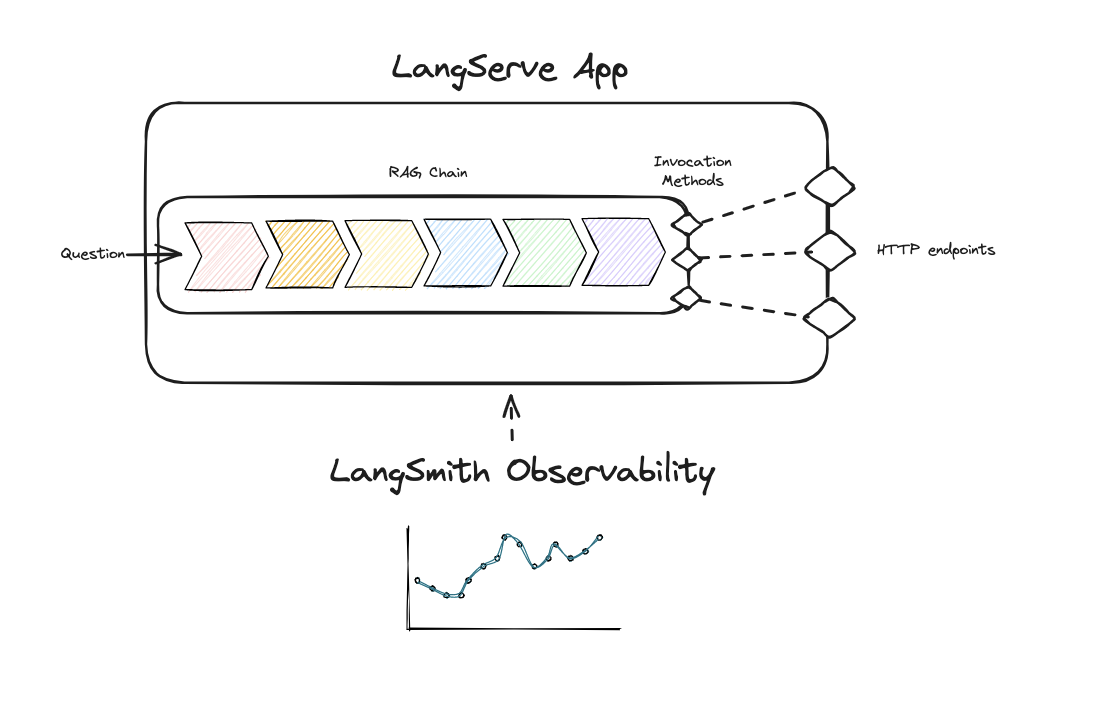

```
$ conda create -n template-testing-env python=3.11
$ conda activate template-testing-env
$ pip install -U "langchain-cli[serve]" "langserve[all]"
$ langchain app new .
$ poetry add langchain-nomic langchain_community tiktoken langchain-openai chromadb langchain
$ poetry install
```

---

Add above logic to new file `chain.py`.

---

Add to `server.py` -

```
from app.chain import chain as nomic_chain
add_routes(app, nomic_chain, path="/nomic-rag")
```

Run - 
```
$ poetry run langchain serve
```